In [5]:
import pydicom as dicom # Read the dicom files
import os
import pandas as pd

dir = '../DSB3/'
data_dir = os.path.join(dir, 'stage1')
paitents = os.listdir(data_dir)
labels_df = pd.read_csv(os.path.join(dir, 'stage1_labels.csv'), index_col=0)

labels_df.head()

cancer
id                                      
0015ceb851d7251b8f399e39779d1e7d       1
0030a160d58723ff36d73f41b170ec21       0
003f41c78e6acfa92430a057ac0b306e       0
006b96310a37b36cccb2ab48d10b49a3       1
008464bb8521d09a42985dd8add3d0d2       1

In [6]:
for paitent in paitents[:5]:
    label = labels_df._get_value(paitent, 'cancer')
    path = os.path.join(data_dir, paitent)
    slices = [dicom.read_file(os.path.join(path, s)) for s in os.listdir(path)]
    slices.sort(key=lambda x: int(x.ImagePositionPatient[2]))

    print(len(slices), slices[0].pixel_array.shape)
    # print(slices[0])

195 (512, 512)
265 (512, 512)
233 (512, 512)
173 (512, 512)
146 (512, 512)


In [7]:
len(paitents)

1595

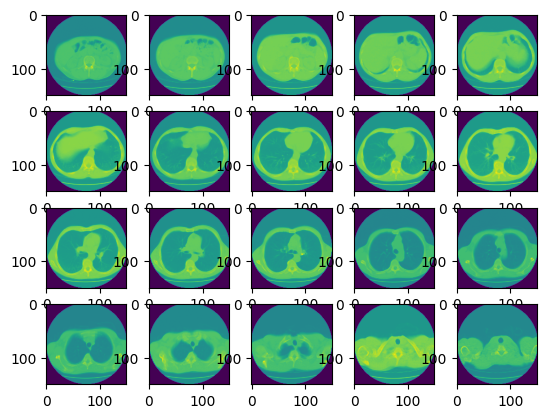

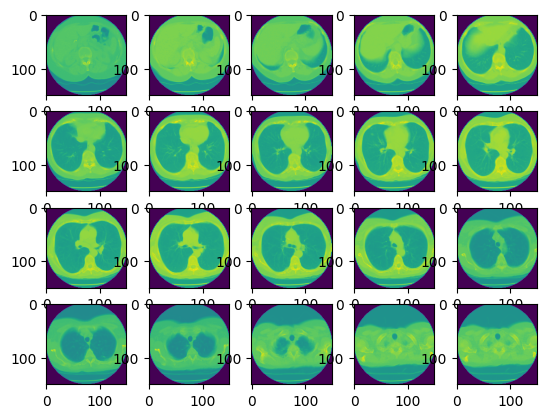

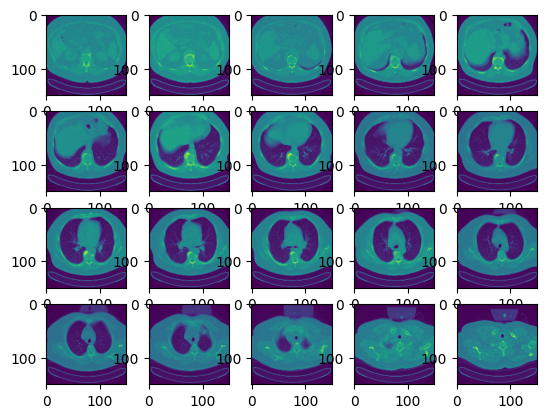

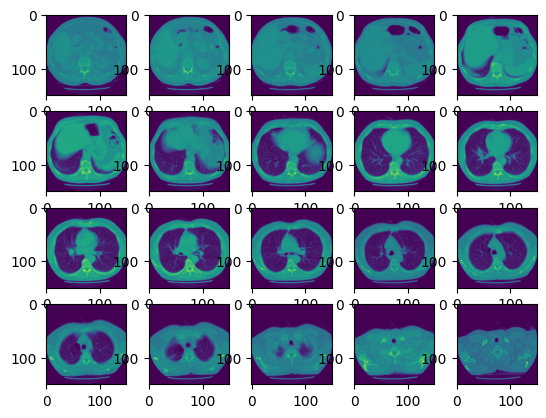

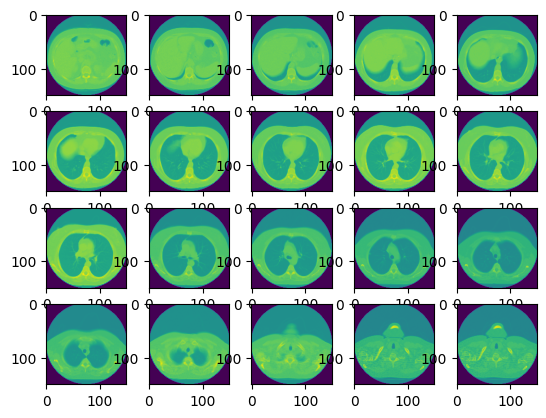

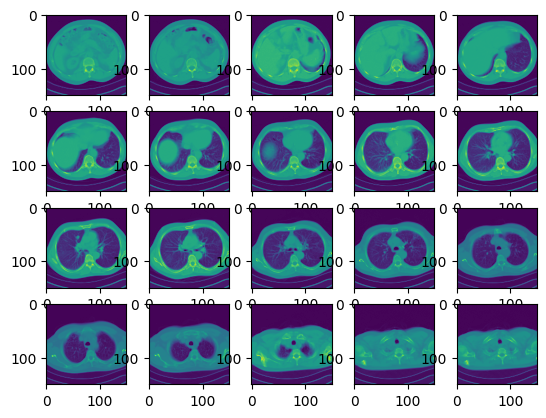

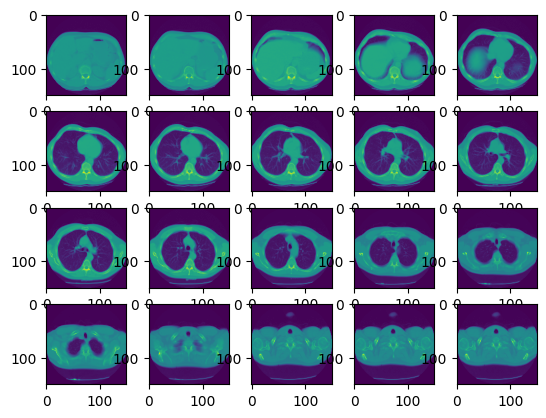

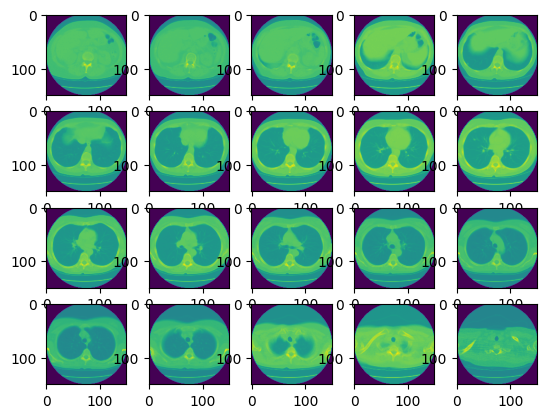

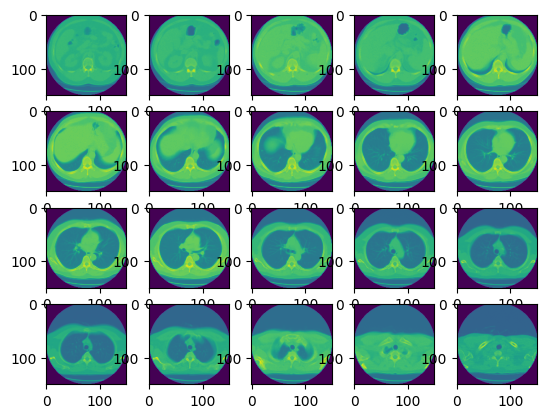

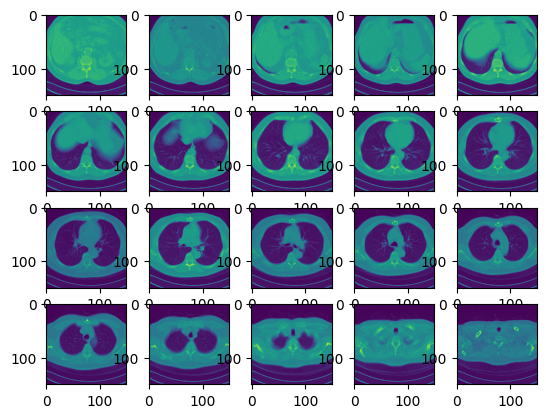

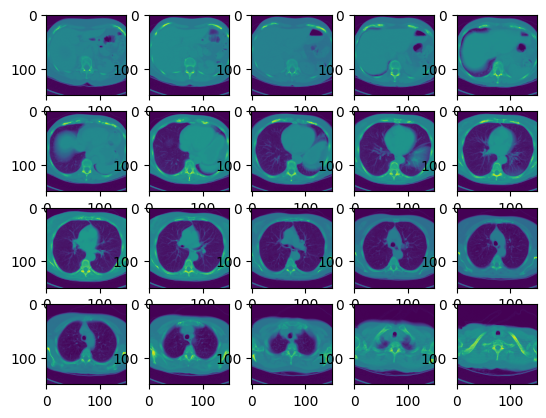

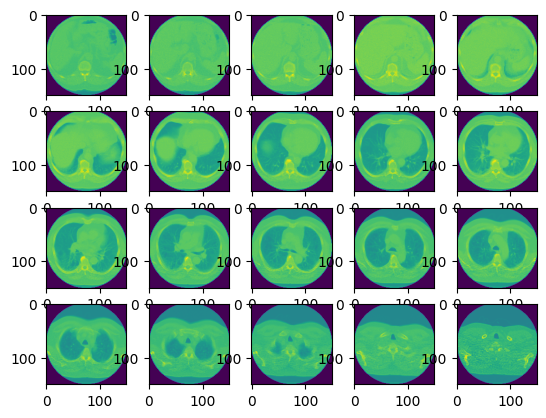

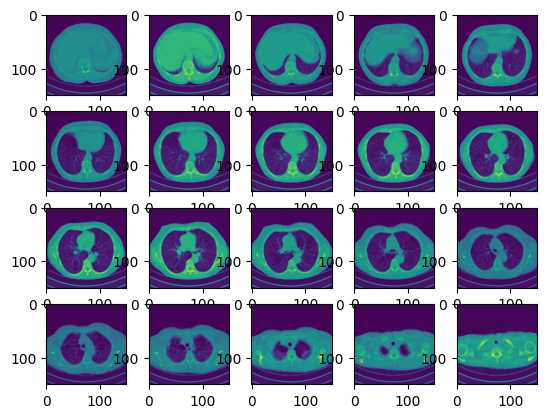

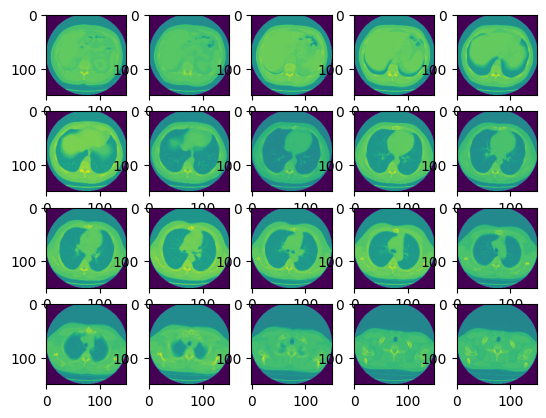

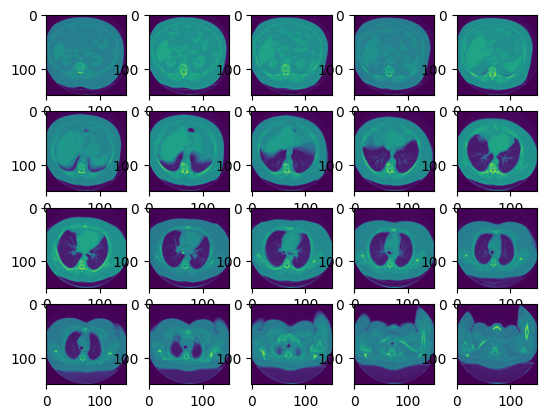

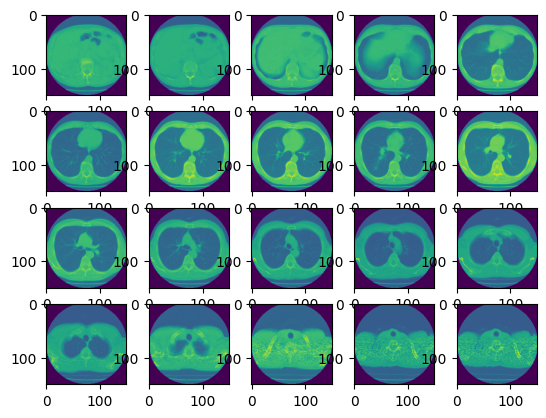

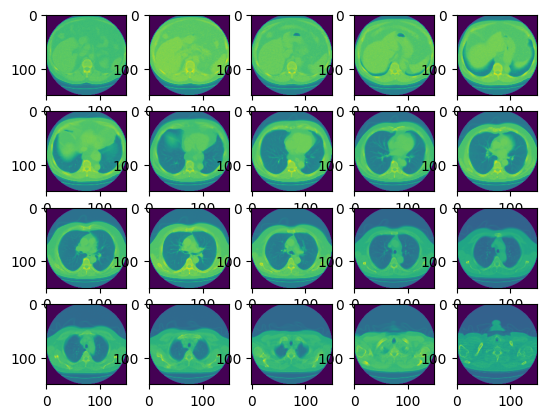

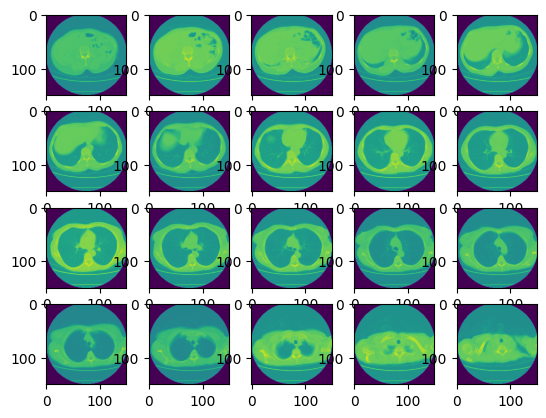

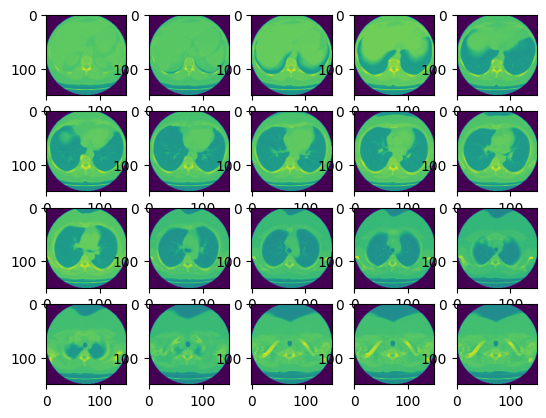

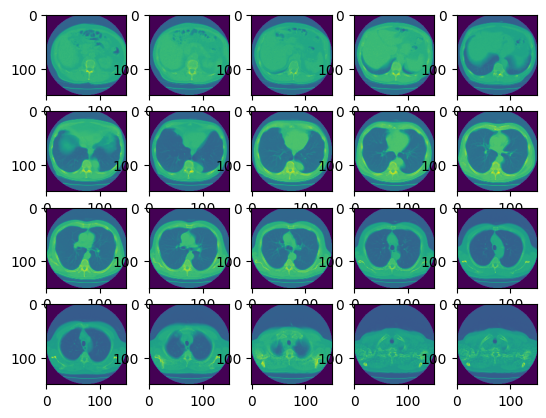

In [22]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math

IMG_PX_SIZE = 150
HM_SLICES = 20

def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

def mean(l):
    return sum(l) / len(l)

for paitent in paitents[:20]:
    label = labels_df._get_value(paitent, 'cancer')
    path = os.path.join(data_dir, paitent)
    slices = [dicom.read_file(os.path.join(path, s)) for s in os.listdir(path)]
    slices.sort(key=lambda x: int(x.ImagePositionPatient[2]))
    
    new_slices = []
    slices = [cv2.resize(np.array(each_slice.pixel_array), (IMG_PX_SIZE, IMG_PX_SIZE)) for each_slice in slices]
    chunk_sizes = math.ceil(len(slices) / HM_SLICES)

    for slice_chunk in chunks(slices, chunk_sizes):
        slice_chunk = list(map(mean, zip(*slice_chunk)))
        new_slices.append(slice_chunk)
    
    while len(new_slices) < HM_SLICES:
        new_slices.append(new_slices[-1])
    
    while len(new_slices) > HM_SLICES:
        new_val = list(map(mean, zip(*[new_slices[-2], new_slices[-1]])))
        del new_slices[-1]
        new_slices[-1] = new_val
    
    if len(new_slices) != 20: print(len(new_slices)) 
    fig = plt.figure()

    for num, each_slice in enumerate(new_slices):
        y = fig.add_subplot(4, 5, num + 1)
        y.imshow(each_slice)
    plt.show()

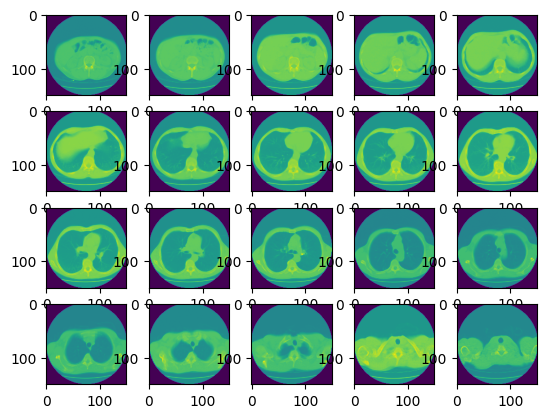

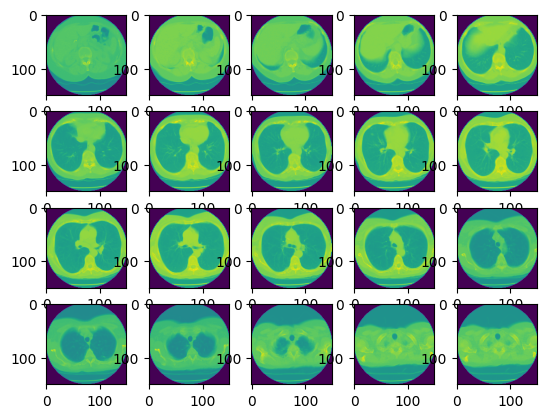

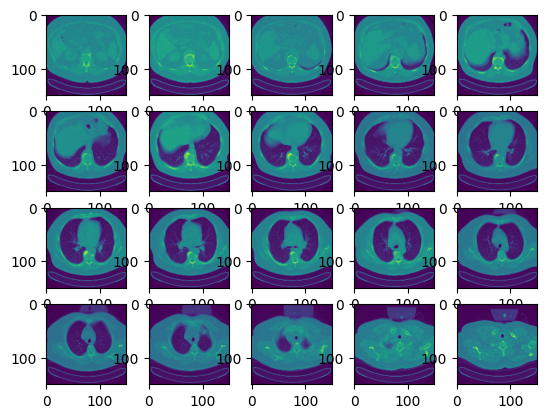

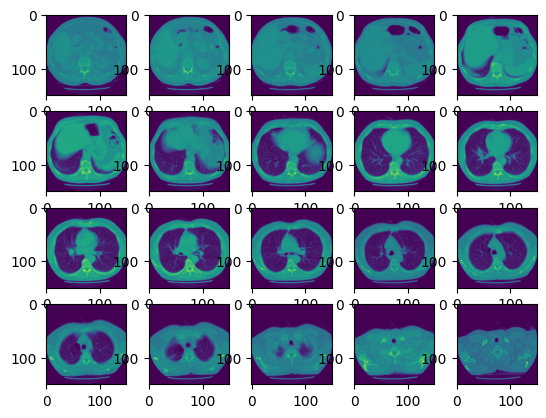

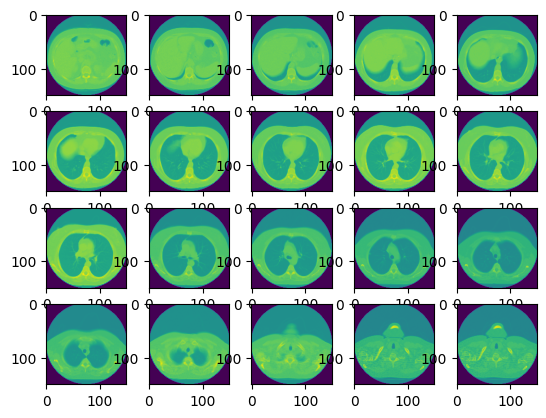

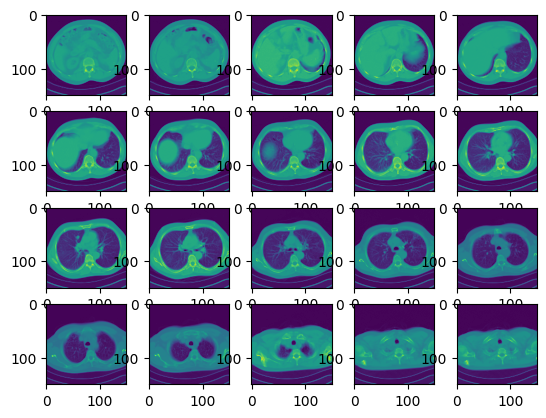

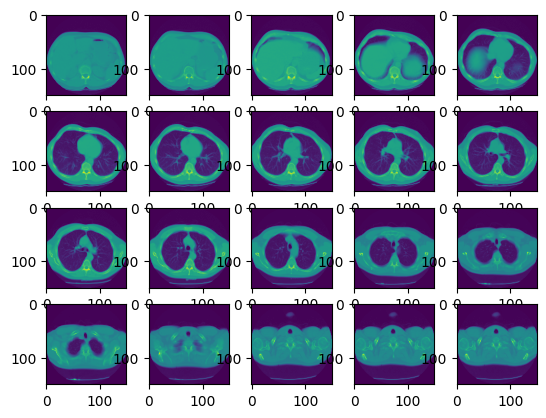

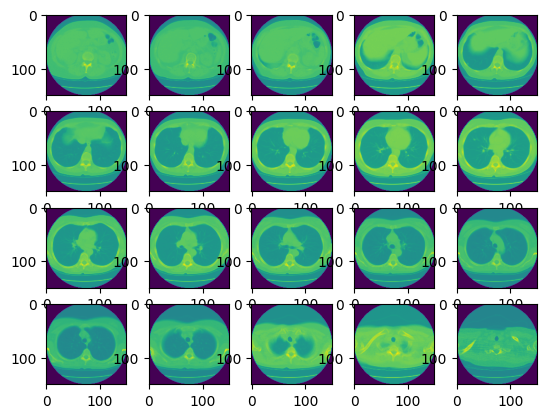

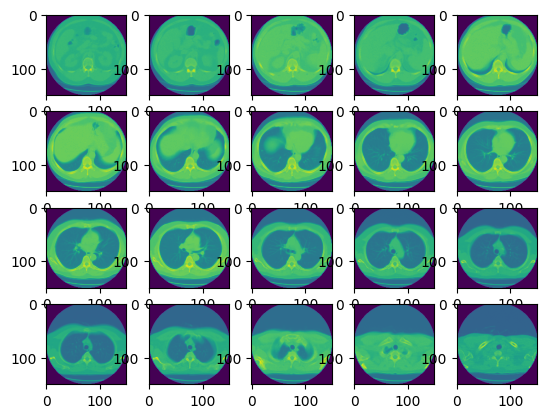

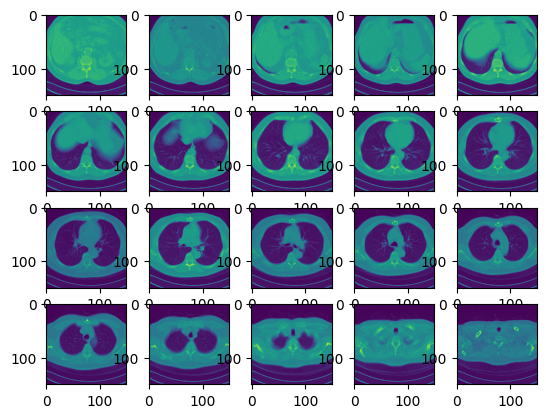

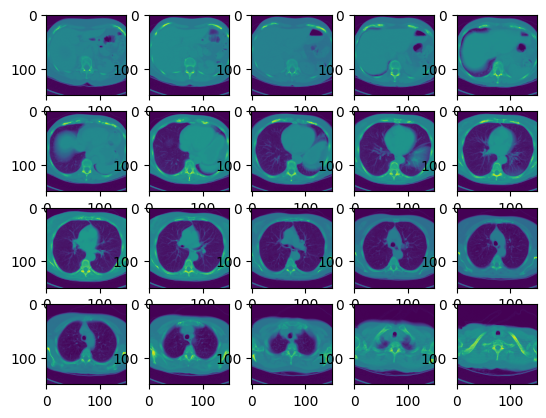

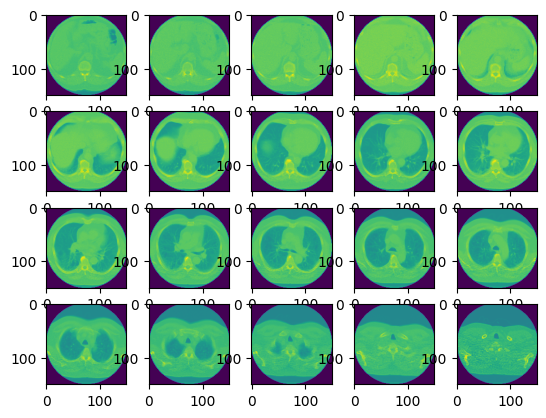

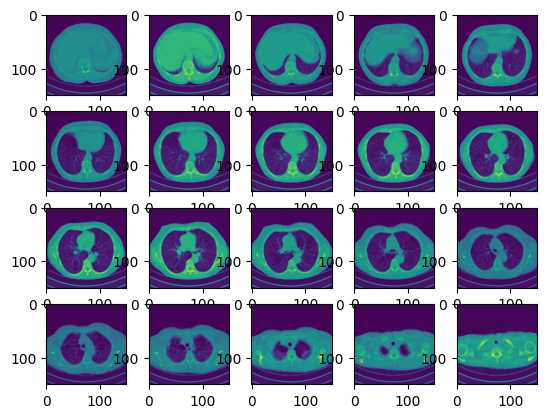

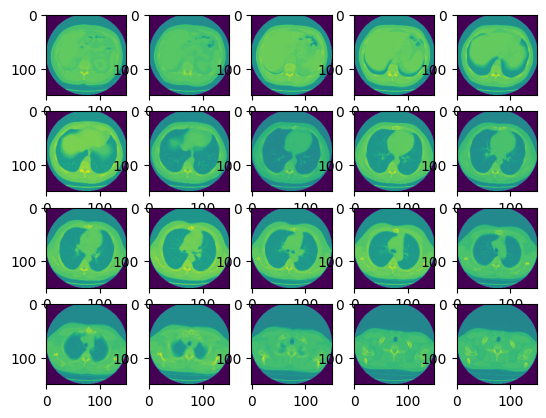

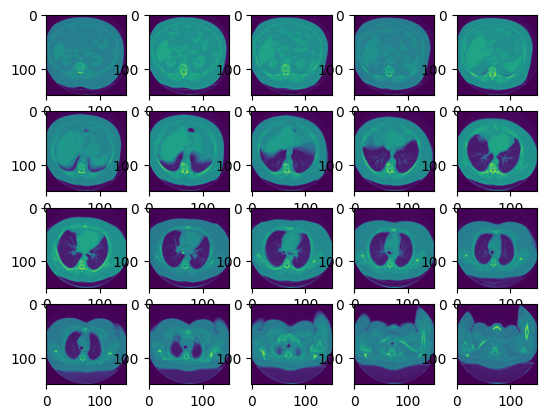

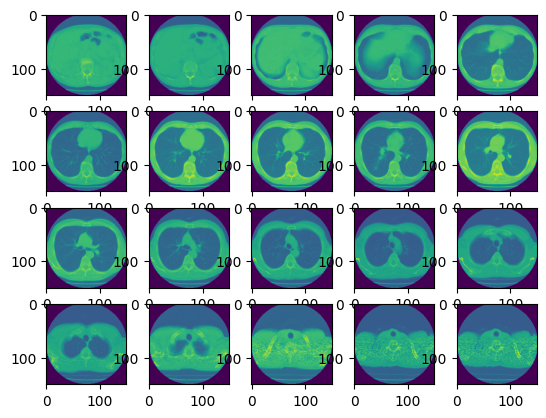

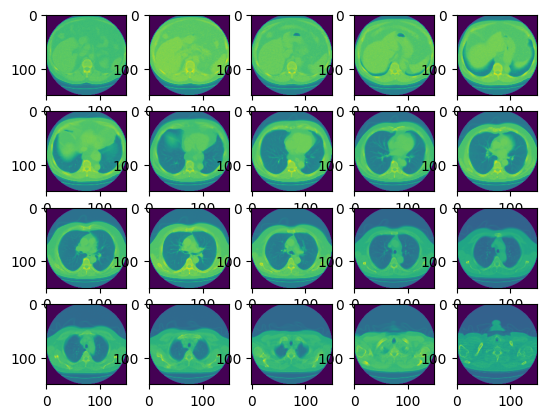

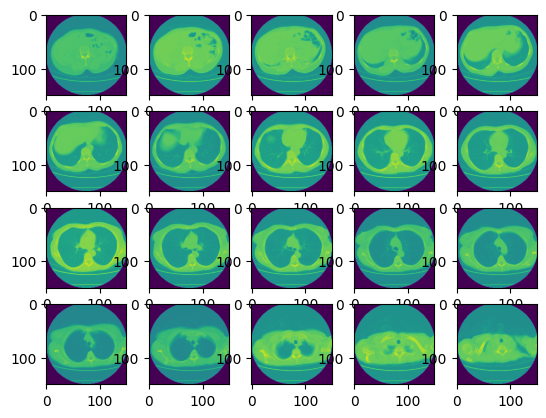

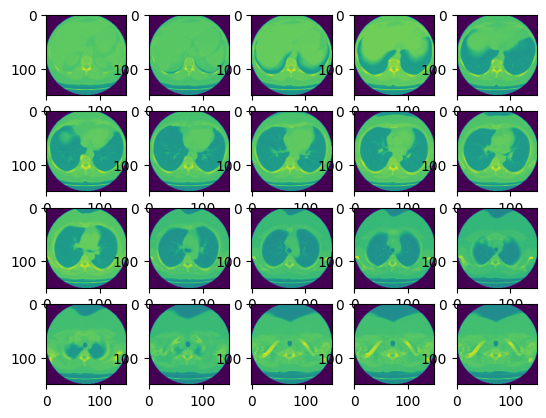

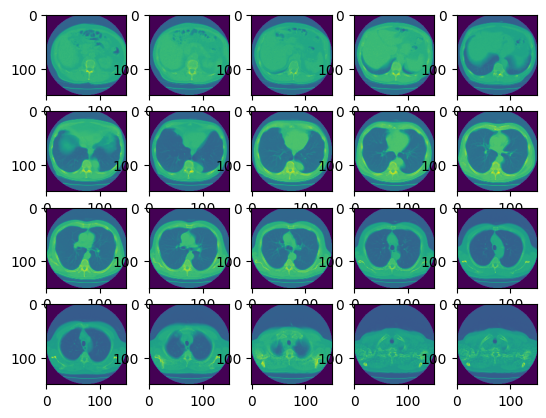

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math

IMG_PX_SIZE = 150
HM_SLICES = 20

def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

def mean(l):
    return sum(l) / len(l)

for paitent in paitents[:20]:
    label = labels_df._get_value(paitent, 'cancer')
    path = os.path.join(data_dir, paitent)
    slices = [dicom.read_file(os.path.join(path, s)) for s in os.listdir(path)]
    slices.sort(key=lambda x: int(x.ImagePositionPatient[2]))
    
    new_slices = []
    slices = [cv2.resize(np.array(each_slice.pixel_array), (IMG_PX_SIZE, IMG_PX_SIZE)) for each_slice in slices]
    chunk_sizes = math.ceil(len(slices) / HM_SLICES)

    for slice_chunk in chunks(slices, chunk_sizes):
        slice_chunk = list(map(mean, zip(*slice_chunk)))
        new_slices.append(slice_chunk)
    
    while len(new_slices) < HM_SLICES:
        new_slices.append(new_slices[-1])
    
    while len(new_slices) > HM_SLICES:
        new_val = list(map(mean, zip(*[new_slices[-2], new_slices[-1]])))
        del new_slices[-1]
        new_slices[-1] = new_val
    
    if len(new_slices) != 20: print(len(new_slices)) 
    fig = plt.figure()

    for num, each_slice in enumerate(new_slices):
        y = fig.add_subplot(4, 5, num + 1)
        y.imshow(each_slice)
    plt.show()